In [91]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import plotly.express as px
import seaborn as sns
import os
from datetime import datetime
from importlib import reload
import functions
reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/universal-analytics-data/functions.py'>

In [75]:
# Cosolidate the Data into a pages CSV file with all quarters.
try:
    df = functions.build_ua_pages_dataframe('flora/flora-pages/Pages/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20211001-20211231.csv
Successfully processed Analytics Flora Bowley Pages 20211001-20211231.csv
Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20220101-20220331.csv
Successfully processed Analytics Flora Bowley Pages 20220101-20220331.csv
Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20210101-20210331.csv
Successfully processed Analytics Flora Bowley Pages 20210101-20210331.csv
Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20210401-20210630.csv
Successfully processed Analytics Flora Bowley Pages 20210401-20210630.csv
Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20210701-20210930.csv
Successfully processed Analytics Flora Bowley Pages 20210701-20210930.csv
Processing file: data/flora/flora-pages/Pages/Analytics Flora Bowley Pages 20220401-20220630.csv
Successfully processed Analytics Flora Bowley Pa

In [81]:
# Read the CSV file
df = pd.read_csv('output/flora/flora-pages/Pages/consolidated-pages.csv')
# Display the DataFrame
print(df.head())

                                   Page Pageviews  Unique Pageviews  \
0                                     /    12,442            9295.0   
1                     /online-learning/     8,666            4801.0   
2  /product/month-of-creative-wellness/     7,166            4678.0   
3             /my-account/members-area/     4,992            3072.0   
4                                /cart/     4,815            2370.0   

  Avg. Time on Page  Entrances  Bounce Rate  % Exit Page Value  Year Quarter  
0          00:01:15     8122.0       0.4146  36.74%      $0.00  2021      Q4  
1          00:01:03     1332.0       0.3641  17.22%      $0.00  2021      Q4  
2          00:01:08     3619.0       0.6170  41.36%      $0.00  2021      Q4  
3          00:00:24      367.0       0.3569   8.07%      $0.00  2021      Q4  
4          00:00:30      205.0       0.6976   9.06%      $0.00  2021      Q4  


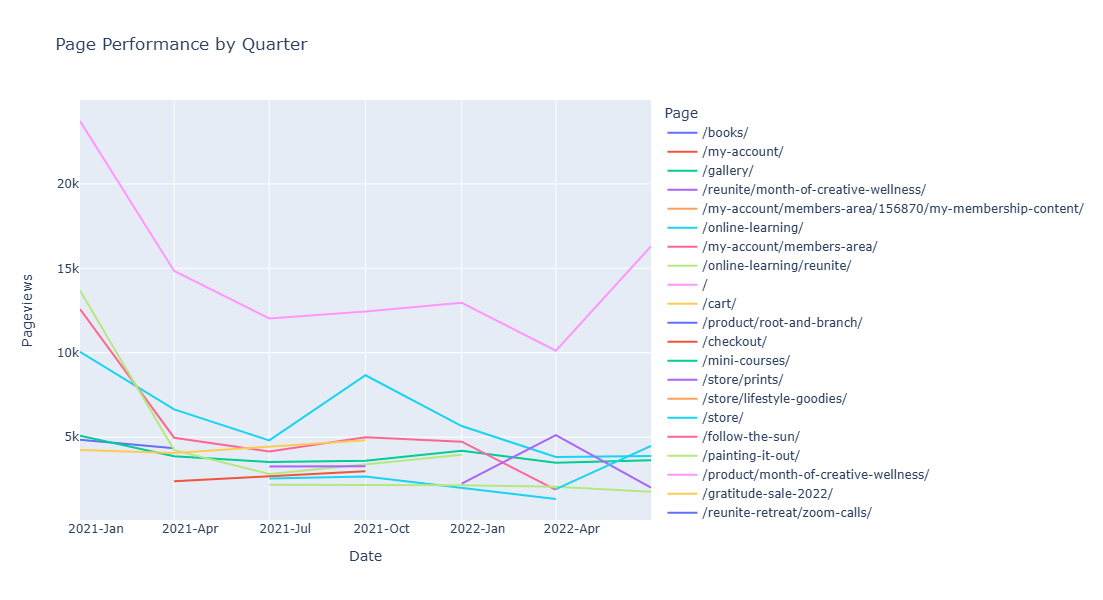

In [118]:
# Read the CSV file
df = pd.read_csv('output/flora/flora-pages/Pages/consolidated-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Pageviews'] = pd.to_numeric(df['Pageviews'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
fig = px.line(df.query('Page != "total"'), x='Date', y='Pageviews', color='Page', title='Page Performance by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/flora/flora-page-performance.html')

In [96]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('flora/flora-sources/Sources/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/flora/flora-sources/Sources/Analytics Flora Bowley All Traffic 20210701-20210930.csv
Successfully processed Analytics Flora Bowley All Traffic 20210701-20210930.csv
Processing file: data/flora/flora-sources/Sources/Analytics Flora Bowley All Traffic 20220101-20220331.csv
Successfully processed Analytics Flora Bowley All Traffic 20220101-20220331.csv
Processing file: data/flora/flora-sources/Sources/Analytics Flora Bowley All Traffic 20201001-20201231.csv
Successfully processed Analytics Flora Bowley All Traffic 20201001-20201231.csv
Processing file: data/flora/flora-sources/Sources/Analytics Flora Bowley All Traffic 20210101-20210331.csv
Successfully processed Analytics Flora Bowley All Traffic 20210101-20210331.csv
Processing file: data/flora/flora-sources/Sources/Analytics Flora Bowley All Traffic 20220701-20220930.csv
Successfully processed Analytics Flora Bowley All Traffic 20220701-20220930.csv
Processing file: data/flora/flora-sources/Sources/Analytics Flora

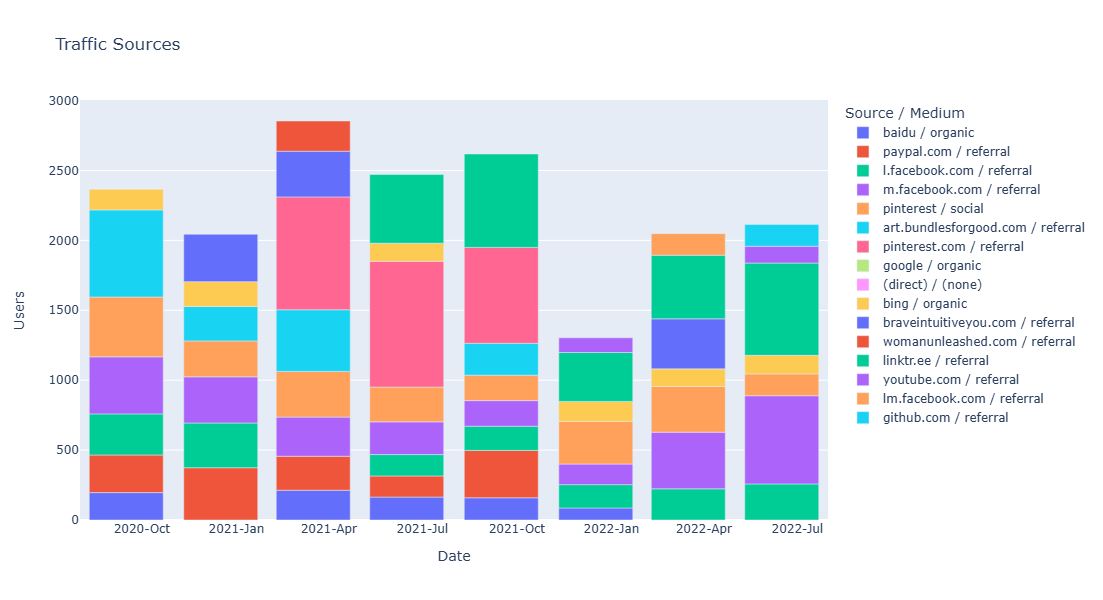

In [141]:

# Read the CSV file
df = pd.read_csv('output/flora/flora-sources/Sources/consolidated-sources.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
fig = px.bar(df.query('`Source / Medium` != "total"'), x='Date', y='Users', color='Source / Medium', title='Traffic Sources')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/flora/flora-sources-mediums.html')

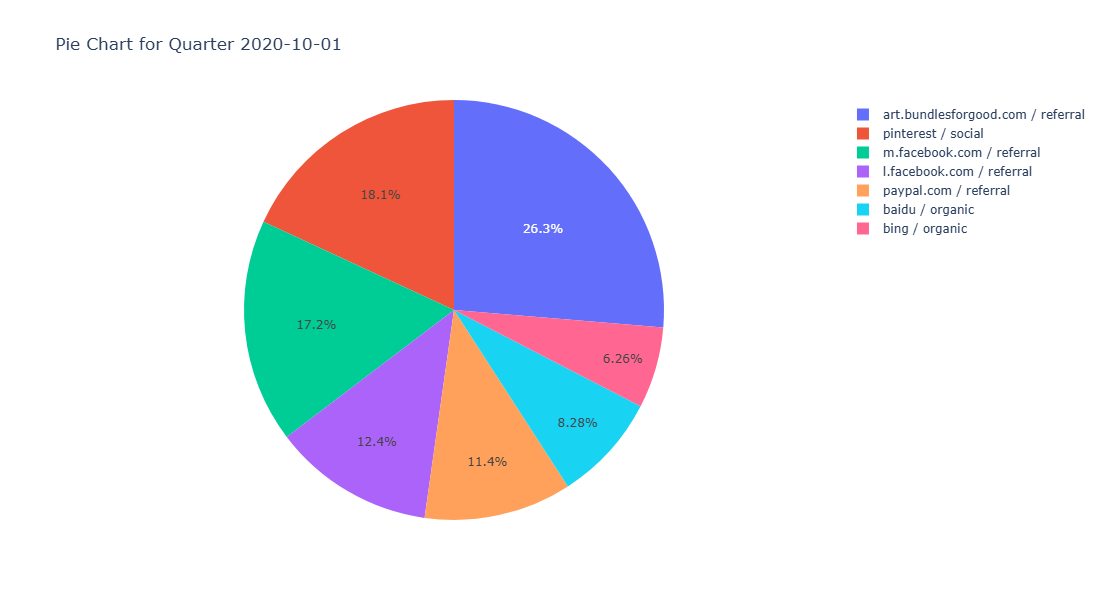

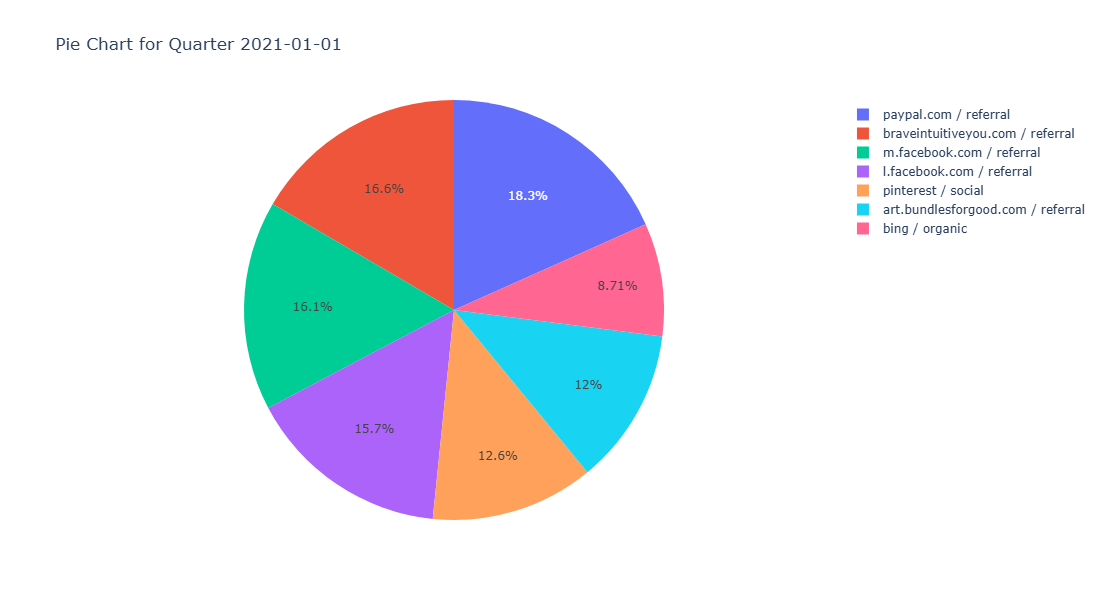

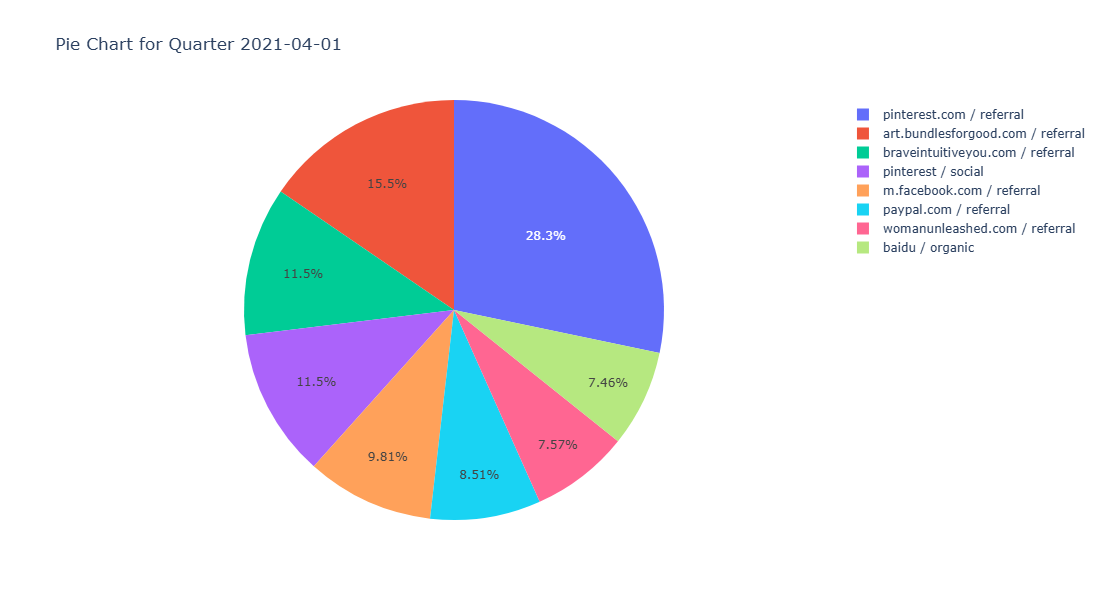

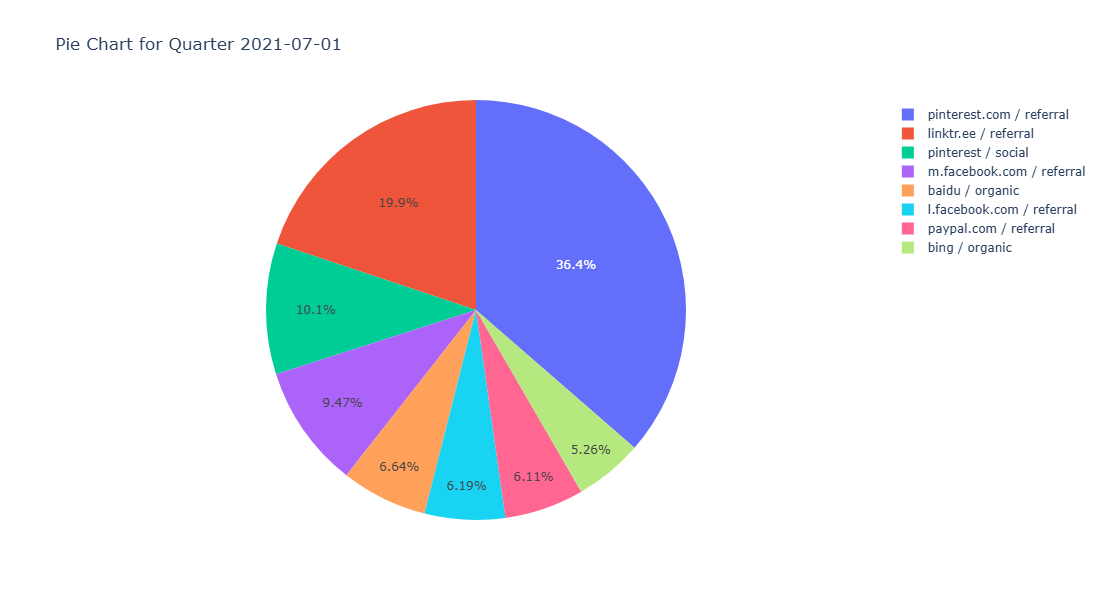

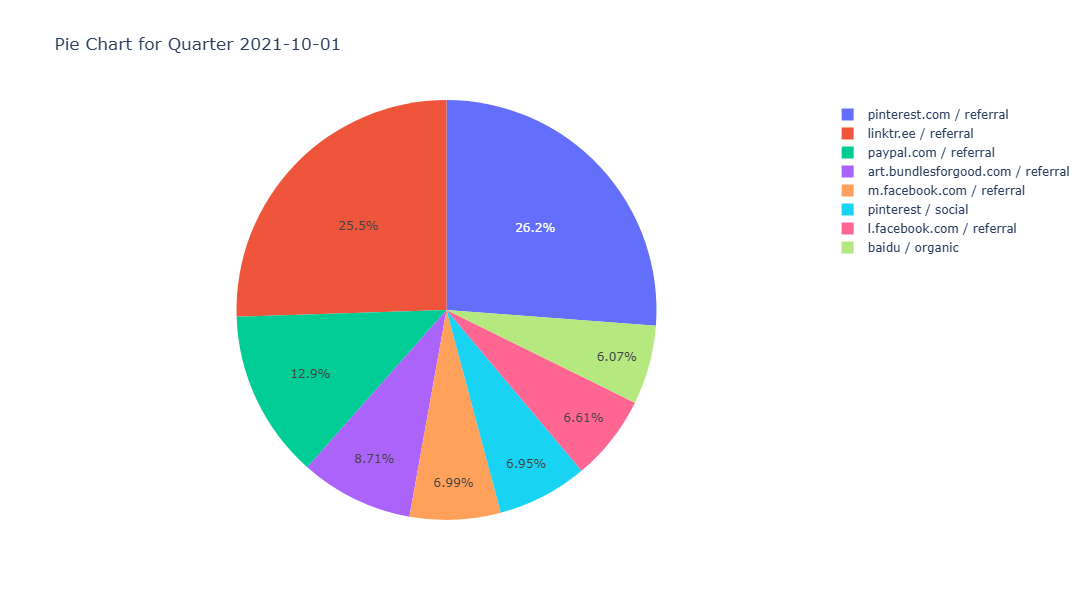

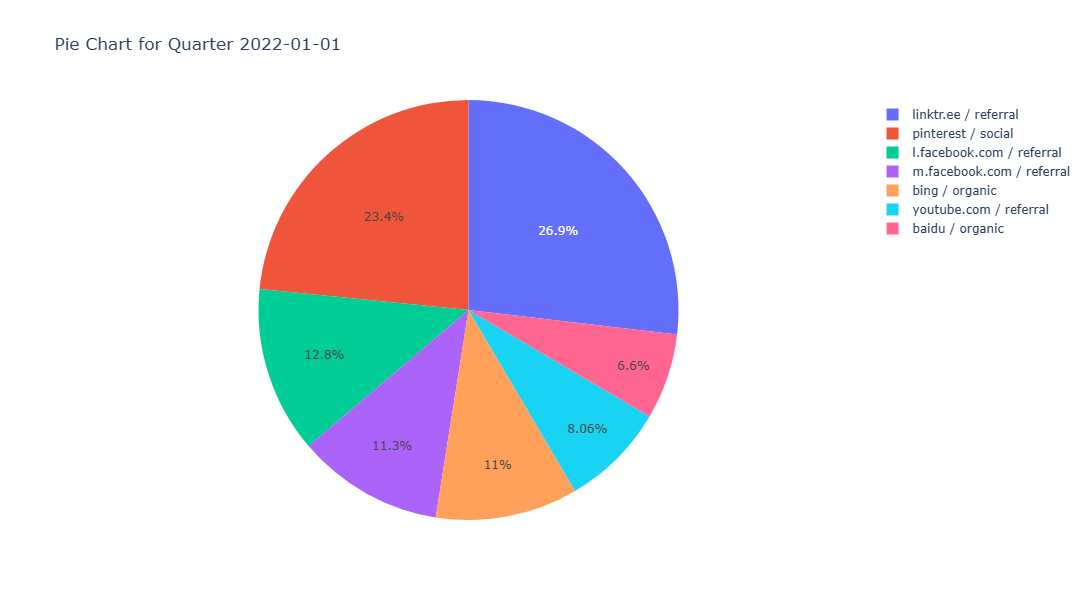

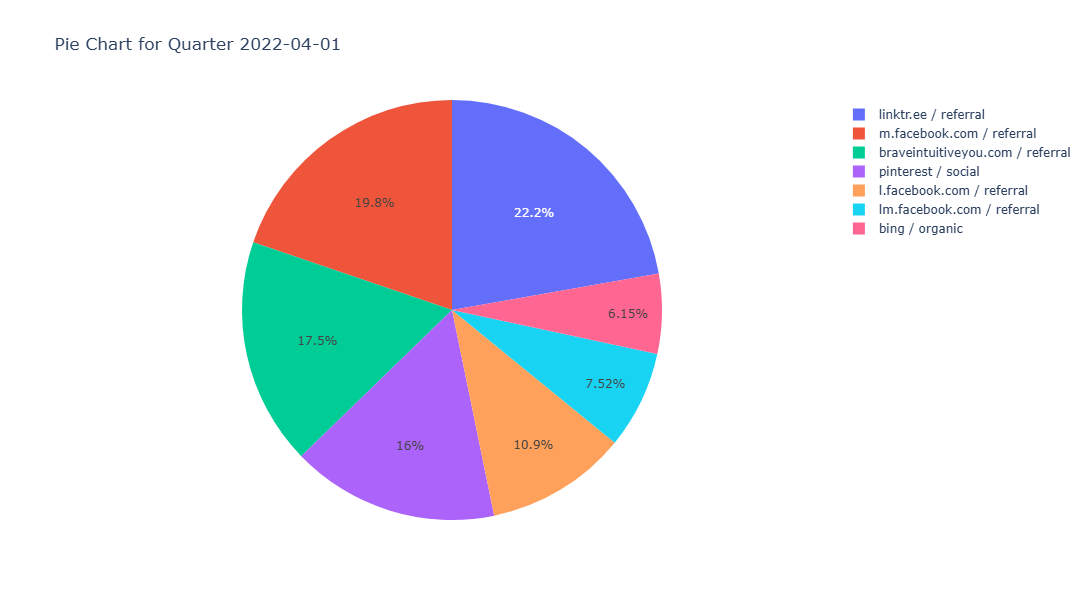

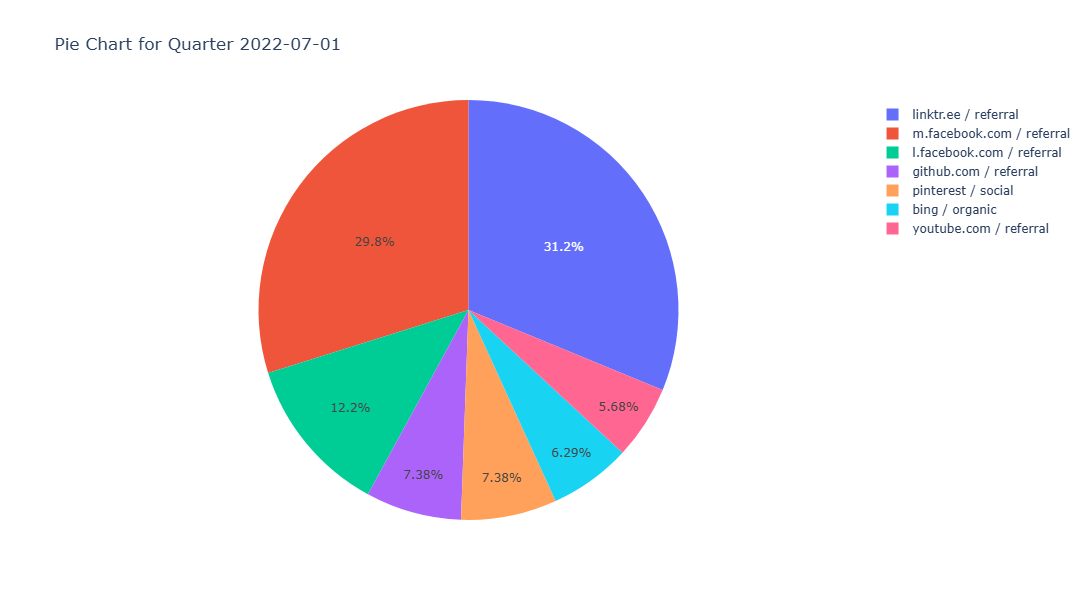

In [112]:
# Convert 'Date' from date time to date type
df['Date'] = df['Date'].dt.date

# Assuming df is your DataFrame and it has columns 'Date' and 'Pageviews'
quarters = df['Date'].unique()
# Update the layout

for quarter in quarters:
    df_quarter = df[df['Date'] == quarter]
    fig = px.pie(df_quarter, values='Users', names='Source / Medium', title=f'Pie Chart for Quarter {quarter}')
    fig.update_layout(
        autosize=False,
        width=600,  # Width of the figure in pixels
        height=600  # Height of the figure in pixels
    )
    fig.show()

In [119]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('flora/flora-landing/Landing Pages/')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/flora/flora-landing/Landing Pages/Analytics Flora Bowley Landing Pages 20211001-20211231.csv
Successfully processed Analytics Flora Bowley Landing Pages 20211001-20211231.csv
Processing file: data/flora/flora-landing/Landing Pages/Analytics Flora Bowley Landing Pages 20210401-20210630.csv
Successfully processed Analytics Flora Bowley Landing Pages 20210401-20210630.csv
Processing file: data/flora/flora-landing/Landing Pages/Analytics Flora Bowley Landing Pages 20210701-20210930.csv
Successfully processed Analytics Flora Bowley Landing Pages 20210701-20210930.csv
Processing file: data/flora/flora-landing/Landing Pages/Analytics Flora Bowley Landing Pages 20201001-20201231.csv
Successfully processed Analytics Flora Bowley Landing Pages 20201001-20201231.csv
Processing file: data/flora/flora-landing/Landing Pages/Analytics Flora Bowley Landing Pages 20220701-20220930.csv
Successfully processed Analytics Flora Bowley Landing Pages 20220701-20220930.csv
Processing file

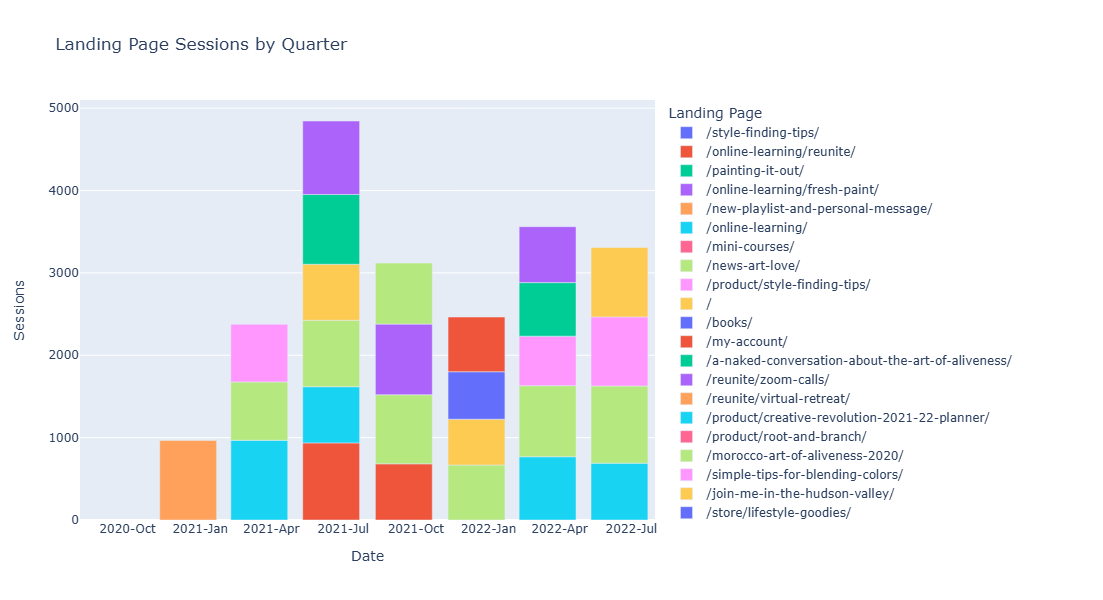

In [140]:
# Read the CSV file
df = pd.read_csv('output/flora/flora-landing/Landing Pages/consolidated-landing-pages.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Sort by date
df = df.sort_values("Date")

# Create Line Plot with No Total
fig = px.bar(df.query('`Landing Page` != "total"'), x='Date', y='Sessions', color='Landing Page', title='Landing Page Sessions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/flora/flora-landing-pages.html')

In [126]:
# Usage
try:
    df = functions.build_ua_pages_dataframe('flora/flora-events-conversions/Events or Conversions')
    # print(df.head())
    print(df.dtypes)
except ValueError as e:
    print(f"Error: {str(e)}")

Processing file: data/flora/flora-events-conversions/Events or Conversions/Analytics Flora Bowley Goal URLs 20210101-20210331.csv
Successfully processed Analytics Flora Bowley Goal URLs 20210101-20210331.csv
Processing file: data/flora/flora-events-conversions/Events or Conversions/Analytics Flora Bowley Goal URLs 20210401-20210630.csv
Successfully processed Analytics Flora Bowley Goal URLs 20210401-20210630.csv
Processing file: data/flora/flora-events-conversions/Events or Conversions/Analytics Flora Bowley Goal URLs 20211001-20211231.csv
Successfully processed Analytics Flora Bowley Goal URLs 20211001-20211231.csv
Processing file: data/flora/flora-events-conversions/Events or Conversions/Analytics Flora Bowley Goal URLs 20220401-20220630.csv
Successfully processed Analytics Flora Bowley Goal URLs 20220401-20220630.csv
Processing file: data/flora/flora-events-conversions/Events or Conversions/Analytics Flora Bowley Goal URLs 20220701-20220930.csv
Successfully processed Analytics Flora

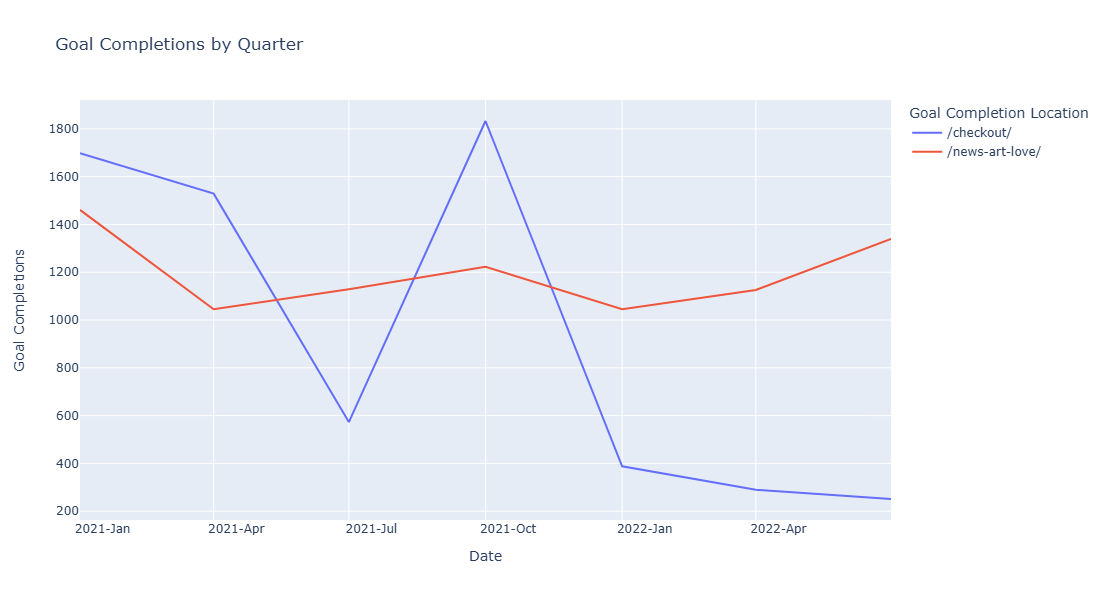

In [139]:
# Read the CSV file
df = pd.read_csv('output/flora/flora-events-conversions/Events or Conversions/consolidated-goal-urls.csv')

# # Now, let's create the Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Quarter'].apply(functions.quarter_to_month) + '-01')

# Convert Pageviews to Numeric
df['Goal Completions'] = pd.to_numeric(df['Goal Completions'].str.replace(',', ''), errors='coerce')
# Sort by date
df = df.sort_values("Date")

# Create Line Plot with the goals completion locations that exist
fig = px.line(df.query('(`Goal Completion Location` == "/checkout/") | (`Goal Completion Location` == "/news-art-love/")'), x='Date', y='Goal Completions', color='Goal Completion Location', title='Goal Completions by Quarter')

# Update the layout
fig.update_layout(
    autosize=False,
    width=1200,  # Width of the figure in pixels
    height=600  # Height of the figure in pixels
)

# Customize the x-axis to show both year and quarter
fig.update_xaxes(
    dtick="M3",
    tickformat="%Y-%b",  # This will show Year-Month
    ticklabelmode="period"
)

fig.show()
fig.write_html('output/flora/flora-goal-urls.html')